# ADS Homework #7: Network Analysis
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, December 17, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu.

In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [3]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework1/lesmis.gml
G = nx.read_gml('lesmis.gml')

In [5]:
print(G.nodes())
print(G.edges())

['Montparnasse', 'Grantaire', 'Woman1', 'Anzelma', 'Gribier', 'Pontmercy', 'Gavroche', 'Valjean', 'Combeferre', 'Favourite', 'MmeMagloire', 'Scaufflaire', 'Bahorel', 'Jondrette', 'BaronessT', 'LtGillenormand', 'Bossuet', 'Feuilly', 'Cochepaille', 'Labarre', 'Zephine', 'Javert', 'Marguerite', 'CountessDeLo', 'Cravatte', 'Gueulemer', 'Champmathieu', 'MmePontmercy', 'Eponine', 'Perpetue', 'MlleGillenormand', 'OldMan', 'Chenildieu', 'Courfeyrac', 'Listolier', 'MmeDeR', 'Napoleon', 'Gervais', 'Cosette', 'Prouvaire', 'Child1', 'Fameuil', 'Babet', 'Toussaint', 'Joly', 'Marius', 'Myriel', 'MmeThenardier', 'Geborand', 'Claquesous', 'Woman2', 'Tholomyes', 'Gillenormand', 'Fantine', 'MlleBaptistine', 'Champtercier', 'Brevet', 'Judge', 'MlleVaubois', 'Magnon', 'Mabeuf', 'Boulatruelle', 'MotherPlutarch', 'MmeBurgon', 'Brujon', 'Blacheville', 'Enjolras', 'Simplice', 'Count', 'Child2', 'Dahlia', 'Fauchelevent', 'MotherInnocent', 'Thenardier', 'Isabeau', 'Bamatabois', 'MmeHucheloup']
[('Montparnasse',

## Problem 1 (20% of credit) 
Visualize the network with node labes and sizes proportional to node degree

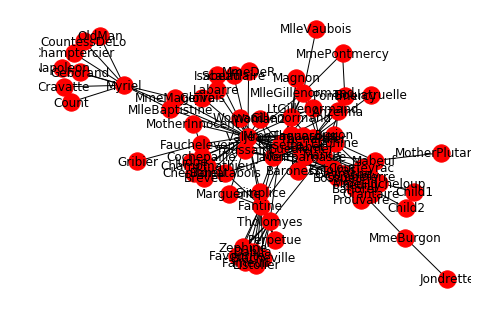

In [6]:
nx.draw(G,with_labels=True)

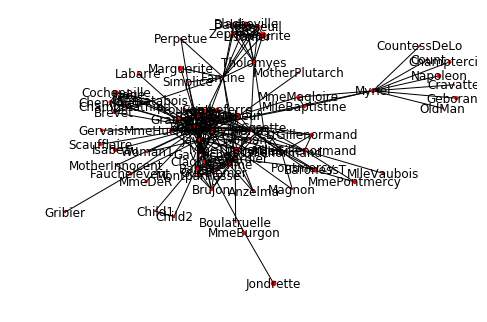

In [112]:
d=nx.degree(G)
nx.draw(G,node_size=10000*list(dict(G.degree()).values()),label_size=list(dict(G.degree()).values()),with_labels=True)

## Problem 2 (30% of credit)
Output the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality

In [37]:
#output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}  : {3}'.format(i+1,ind[i],G.nodes[ind[i]],d[ind[i]]))
    return ind

In [38]:
mc1=dict(nx.degree(G))
ind1=topdict(mc1,5)

1|Valjean  : 36
2|Gavroche  : 22
3|Marius  : 19
4|Javert  : 17
5|Thenardier  : 16


b) eigenvector centrality

In [41]:
mc2 = nx.pagerank(G,0.85)
ind2=topdict(mc2,5)

1|Valjean  : 0.07543374445332474
2|Myriel  : 0.042803439760757324
3|Gavroche  : 0.03576412343161934
4|Marius  : 0.030892701920406464
5|Javert  : 0.03030259712717036


c) betweenness centrality

In [39]:
mc3 = nx.betweenness_centrality(G)
ind3=topdict(mc3,5)

1|Valjean  : 0.5699890527836187
2|Myriel  : 0.17684210526315788
3|Gavroche  : 0.16511250242584768
4|Marius  : 0.132032488621946
5|Fantine  : 0.1296445409881942


d) closeness centrality

In [40]:
mc4 = nx.closeness_centrality(G)
ind4=topdict(mc4,5)

1|Valjean  : 0.6440677966101694
2|Marius  : 0.5314685314685315
3|Javert  : 0.5170068027210885
4|Thenardier  : 0.5170068027210885
5|Gavroche  : 0.5135135135135135


## Problem 3 (25% of credit)
Analyze the impact of damping parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

So for the values of damping parameter between 0.4 and 0.95 top five nodes are the same, just the order is varied slightly (exactly the same between 0.7 and 0.85). For the values $\alpha=0.1-0.3$ node 55 is replaced with the node 25 in the top 5 list

In [42]:
mc2_95 = nx.pagerank(G,0.95)
ind2=topdict(mc2_95,5)

1|Valjean  : 0.0747043161907721
2|Gavroche  : 0.039552887183772374
3|Marius  : 0.03430243839798216
4|Myriel  : 0.033460628812939514
5|Javert  : 0.03239593175267779


In [43]:
mc2_90 = nx.pagerank(G,0.90)
ind2=topdict(mc2_90,5)

1|Valjean  : 0.0757013790394352
2|Myriel  : 0.03965531861134029
3|Gavroche  : 0.03739018829226063
4|Marius  : 0.03238365765284897
5|Javert  : 0.03134631873222991


In [44]:
mc2_85 = nx.pagerank(G,0.85)
ind2=topdict(mc2_85,5)

1|Valjean  : 0.07543374445332474
2|Myriel  : 0.042803439760757324
3|Gavroche  : 0.03576412343161934
4|Marius  : 0.030892701920406464
5|Javert  : 0.03030259712717036


In [45]:
mc2_80 = nx.pagerank(G,0.80)
ind2=topdict(mc2_80,5)

1|Valjean  : 0.07442184631334865
2|Myriel  : 0.0443411025859056
3|Gavroche  : 0.03435748592585355
4|Marius  : 0.029597643233466885
5|Javert  : 0.029264062175007443


In [46]:
mc2_70 = nx.pagerank(G,0.70)
ind2=topdict(mc2_70,5)

1|Valjean  : 0.07095277173283872
2|Myriel  : 0.04489784761133811
3|Gavroche  : 0.031767940065019734
4|Marius  : 0.027267015891693086
5|Javert  : 0.027205254098042763


In [47]:
mc2_60 = nx.pagerank(G,0.60)
ind2=topdict(mc2_60,5)

1|Valjean  : 0.06608136478461613
2|Myriel  : 0.04355003256779983
3|Gavroche  : 0.029232503859907718
4|Javert  : 0.025172680359553334
5|Marius  : 0.025087179050072315


In [48]:
mc2_50 = nx.pagerank(G,0.50)
ind2=topdict(mc2_50,5)

1|Valjean  : 0.060054818715401706
2|Myriel  : 0.04097024120161402
3|Gavroche  : 0.026658316563914257
4|Javert  : 0.02316213828241852
5|Marius  : 0.02297520755284887


In [49]:
mc2_40 = nx.pagerank(G,0.40)
ind2=topdict(mc2_40,5)

1|Valjean  : 0.0529448267787378
2|Myriel  : 0.03742525493100432
3|Gavroche  : 0.02402389288577136
4|Javert  : 0.021163905231402713
5|Marius  : 0.020905025746071018


In [50]:
mc2_30 = nx.pagerank(G,0.30)
ind2=topdict(mc2_30,5)

1|Valjean  : 0.04474921315308957
2|Myriel  : 0.03295546624663094
3|Gavroche  : 0.021329496596520198
4|Javert  : 0.019164883853087056
5|Thenardier  : 0.019058776576435447


In [51]:
mc2_20 = nx.pagerank(G,0.20)
ind2=topdict(mc2_20,5)

1|Valjean  : 0.035419493802025144
2|Myriel  : 0.027495120006737393
3|Gavroche  : 0.018583426528045167
4|Thenardier  : 0.01718586542614887
5|Javert  : 0.01714898428962244


In [52]:
mc2_10 = nx.pagerank(G,0.10)
ind2=topdict(mc2_10,5)

1|Valjean  : 0.024870471094876317
2|Myriel  : 0.020910423735306043
3|Gavroche  : 0.01579776348483299
4|Thenardier  : 0.015167220377215374
5|Javert  : 0.01509708728536251


## Problem 4 (25% of credit) 
Analyze the degree distribution - visualize it and try to fit with a log-normal distribution.

In [53]:
dict(G.degree())

{'Anzelma': 3,
 'Babet': 10,
 'Bahorel': 12,
 'Bamatabois': 8,
 'BaronessT': 2,
 'Blacheville': 7,
 'Bossuet': 13,
 'Boulatruelle': 1,
 'Brevet': 6,
 'Brujon': 7,
 'Champmathieu': 6,
 'Champtercier': 1,
 'Chenildieu': 6,
 'Child1': 2,
 'Child2': 2,
 'Claquesous': 10,
 'Cochepaille': 6,
 'Combeferre': 11,
 'Cosette': 11,
 'Count': 1,
 'CountessDeLo': 1,
 'Courfeyrac': 13,
 'Cravatte': 1,
 'Dahlia': 7,
 'Enjolras': 15,
 'Eponine': 11,
 'Fameuil': 7,
 'Fantine': 15,
 'Fauchelevent': 4,
 'Favourite': 7,
 'Feuilly': 11,
 'Gavroche': 22,
 'Geborand': 1,
 'Gervais': 1,
 'Gillenormand': 7,
 'Grantaire': 10,
 'Gribier': 1,
 'Gueulemer': 10,
 'Isabeau': 1,
 'Javert': 17,
 'Joly': 12,
 'Jondrette': 1,
 'Judge': 6,
 'Labarre': 1,
 'Listolier': 7,
 'LtGillenormand': 4,
 'Mabeuf': 11,
 'Magnon': 2,
 'Marguerite': 2,
 'Marius': 19,
 'MlleBaptistine': 3,
 'MlleGillenormand': 7,
 'MlleVaubois': 1,
 'MmeBurgon': 2,
 'MmeDeR': 1,
 'MmeHucheloup': 7,
 'MmeMagloire': 3,
 'MmePontmercy': 2,
 'MmeThenardier'

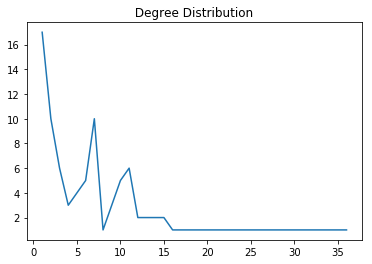

In [98]:
degs = {}
for n in G.nodes () :
    deg = G.degree ( n )
    if deg not in degs :
        degs [ deg ] = 0
    degs [ deg ] += 1
items = sorted(degs.items())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
plt.title( " Degree Distribution " )

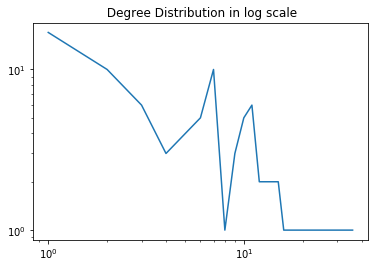

In [99]:
degs = {}
for n in G.nodes () :
    deg = G.degree ( n )
    if deg not in degs :
        degs [ deg ] = 0
    degs [ deg ] += 1
items = sorted(degs.items())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
plt.xscale('log')
plt.yscale('log')
plt.title( " Degree Distribution in log scale" )

Thanks for reading my homework!